    valores de fi:  [229.3  290.05 351.2  403.25 437.9 ]
divisores en L(i):  [24. -6.  4. -6. 24.]

Polinomio de Lagrange, expresiones
9.55416666666667*(x - 5)*(x - 4)*(x - 3)*(x - 2) - 48.3416666666667*(x - 5)*(x - 4)*(x - 3)*(x - 1) + 87.8*(x - 5)*(x - 4)*(x - 2)*(x - 1) - 67.2083333333333*(x - 5)*(x - 3)*(x - 2)*(x - 1) + 18.2458333333333*(x - 4)*(x - 3)*(x - 2)*(x - 1)

Polinomio de Lagrange: 
0.0499999999999972*x**4 - 2.08333333333326*x**3 + 11.4499999999998*x**2 + 40.2333333333336*x + 179.65


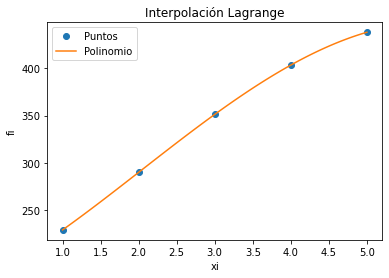

In [271]:
# Interpolacion de Lagrange
# divisoresL solo para mostrar valores
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
xi= np.array([1, 2, 3, 4, 5])
fi= np.array([229.30, 290.05, 351.20, 403.25, 437.90])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
#plt.ylim(0,3)
plt.show()

In [272]:
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np
##### Datos experimentales #############
## pueden ser  x: los datos del número de iteraciones y y: la solución aproximada o el error verdadero o error normalizo #####
xi= np.array([1, 2, 3, 4, 5])
fi= np.array([229.30, 290.05, 351.20, 403.25, 437.90])
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
###### usaremos polinomios de grado 2  ###############
pf = PolynomialFeatures(degree = 2) 
####### transformamos la entrada en polinómica ######
X = pf.fit_transform(xi.reshape(-1,1))  
####### creamos una instancia de LinearRegression ######
regresion_lineal = LinearRegression() 
# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, fi) 
# vemos los parámetros que ha estimado la regresión lineal
#### Los parametros vienen ordenados como w = [0 , A x, B x^2], b ==> b + Ax +Bx^2
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [ 0.         79.31142857 -4.37857143], b = 152.5700000000005


In [273]:
import scipy
scipy.version.version

'1.4.1'

In [274]:
import numpy as np
from scipy.interpolate import CubicSpline

# calculate 5 natural cubic spline polynomials for 9 points

#x = np.array([2.0, 1.5, 1.0, 0.5, 0, 0.5, 1.0, 1.5, 2.0])
#y = np.array([0.0, 0.2, 0.7, 1.0, 0.0, -1.0, -0.7, -0.2, 0.0])
x = np.array([0, 0.5, 1.0, 1.5, 2.0])
y = np.array([0.0, -1.0, -0.7, -0.2, 0.0])

# calculate natural cubic spline polynomials
cs = CubicSpline(x,y,bc_type='natural')

# show values of interpolation function at x=1.25
print('S(1.25) = ', cs(1.25))

## Aditional - find polynomial coefficients for different x regions

# if you want to print polynomial coefficients in form
# S0(0<=x<=1) = a0 + b0(x-x0) + c0(x-x0)^2 + d0(x-x0)^3
# S1(1< x<=2) = a1 + b1(x-x1) + c1(x-x1)^2 + d1(x-x1)^3
# ...
# S4(4< x<=5) = a4 + b4(x-x4) + c5(x-x4)^2 + d5(x-x4)^3
# x0 = 0; x1 = 1; x4 = 4; (start of x region interval)

# show values of a0, b0, c0, d0, a1, b1, c1, d1 ...
cs.c

# Polynomial coefficients for 0 <= x <= 1
a0 = cs.c.item(3,0)
b0 = cs.c.item(2,0)
c0 = cs.c.item(1,0)
d0 = cs.c.item(0,0)

# Polynomial coefficients for 1 < x <= 2
a1 = cs.c.item(3,1)
b1 = cs.c.item(2,1)
c1 = cs.c.item(1,1)
d1 = cs.c.item(0,1)

# Polynomial coefficients for 1 < x <= 2
a2 = cs.c.item(3,2)
b2 = cs.c.item(2,2)
c2 = cs.c.item(1,2)
d2 = cs.c.item(0,2)

# Polynomial coefficients for 1 < x <= 2
a3 = cs.c.item(3,3)
b3 = cs.c.item(2,3)
c3 = cs.c.item(1,3)
d3 = cs.c.item(0,3)

# Polynomial coefficients for 4 < x <= 5
#a4 = cs.c.item(3,4)
#b4 = cs.c.item(2,4)
#c4 = cs.c.item(1,4)
#d4 = cs.c.item(0,4)

# Print polynomial equations for different x regions
print('S0(0<=x<=0.5) = ', a0, ' + ', b0, '(x-0) + ', c0, '(x-0)^2  + ', d0, '(x-0)^3')
print('S1(0.5< x<=1) = ', a1, ' + ', b1, '(x-1) + ', c1, '(x-1)^2  + ', d1, '(x-1)^3')
print('S1(1< x<=1.5) = ', a2, ' + ', b2, '(x-1) + ', c2, '(x-1)^2  + ', d2, '(x-1)^3')
print('S1(1.5< x<=2.0) = ', a3, ' + ', b3, '(x-1) + ', c3, '(x-1)^2  + ', d3, '(x-1)^3')
print('...')
#print('S5(4< x<=5) = ', a4, ' + ', b4, '(x-4) + ', c4, '(x-4)^2  + ', d4, '(x-4)^3')

# So we can calculate S(1.25) by using equation S1(1< x<=2)
print('S(1.25) = ', a1 + b1*0.25 + c1*(0.25**2) + d1*(0.25**3))

S(1.25) =  -0.4178571428571428
S0(0<=x<=0.5) =  0.0  +  -2.657142857142857 (x-0) +  -8.881784197001252e-16 (x-0)^2  +  2.62857142857143 (x-0)^3
S1(0.5< x<=1) =  -1.0  +  -0.6857142857142856 (x-1) +  3.942857142857142 (x-1)^2  +  -2.7428571428571424 (x-1)^3
S1(1< x<=1.5) =  -0.7  +  1.2000000000000002 (x-1) +  -0.17142857142857237 (x-1)^2  +  -0.4571428571428564 (x-1)^3
S1(1.5< x<=2.0) =  -0.2  +  0.6857142857142854 (x-1) +  -0.8571428571428563 (x-1)^2  +  0.5714285714285712 (x-1)^3
...
S(1.25) =  -0.9678571428571429


x = [0.00000000e+00 4.88758553e-03 9.77517107e-03 ... 4.99022483e+00
 4.99511241e+00 5.00000000e+00]


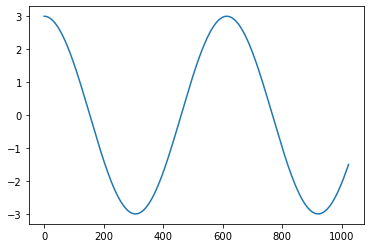

In [470]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
x = np.linspace(0, 5, 2**10,endpoint=True)
print("x =",x)
Coseno = 3*np.cos((2*np.pi*x)/3)
plt.plot(Coseno)
show()

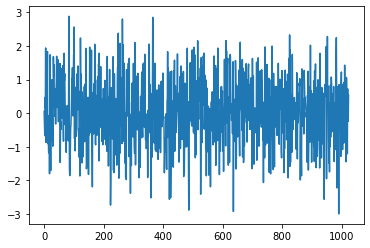

In [471]:
noise = np.random.normal(0,1,2**10)
plt.plot(noise)
show()

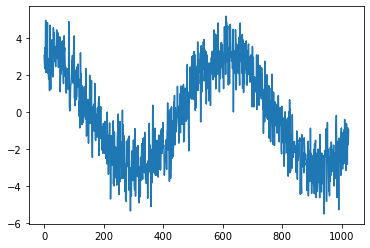

In [472]:
suma = Coseno + noise
plt.plot(suma)
show()

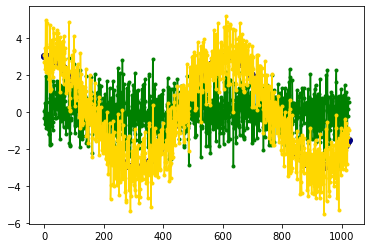

In [473]:
plt.plot(Coseno,color='navy', marker='o', label='training points')
plt.plot(noise,color='green', marker='.', label='training points')
plt.plot(suma,color='gold', marker='.', label='training points')
show()

In [478]:
import numpy.polynomial as P
n = 30
K = 2
x = suma
Nx = len(x)
yc = []
Nw = 2*n+1 # window size
No = n+1 # overlap

# compute weights
wa = []
wb = []
for i in range(0,No,1): # [0,...,64]
    wa.append(1-((i+1)-1)/n)
    wb.append(((i+1)-1)/n)

# compute the trend data
idNw = np.array(range(1,Nw+1,1))
#print("longitud idNw =",len(idNw))
idNwx = np.array(range(0,Nw,1))
#print("longitud idNwx =",len(idNwx))
p,coef = P.polynomial.polyfit(idNw, x[idNwx],K,full=True)
ya = P.polynomial.polyval(idNw,p)
#print("longitud ya =",len(ya))
yc[0:n] = ya[0:n]
for i in range(Nw-1,Nx,n):
    #print("[i] =",i)
    ni = n+i
    #print("ni =",ni)
    m = np.amin(np.array([ni,Nx-1]))
    #print("m =",m)
    idx = np.array(range(i-No+1,m+1,1))
    #print("idx =",idx)
    p,coef = P.polynomial.polyfit(idx,x[idx],K,full=True)
    yb = P.polynomial.polyval(idx,p)
    #Index= np.array(range(i-No+1,i+1))
    #W1= np.array(range(n,Nw))
    #W2= np.array(range(0,n+1))
    #print("[i-No+1:i+1] =",Index)
    #print("[n-1:Nw-1] =",W1)
    #print("[0:n-1] =",W2)
    yc[i-No+1:i+1] = wa*ya[n:Nw]+wb*yb[0:n+1]
    #print("longitud yc =",len(yc))
    ya = yb
#print("[i] =",i)
idyc = np.array(range(i,m+1,1))
#print("longitud idyc =",len(idyc))
p,coef = P.polynomial.polyfit(idyc, x[idyc],K,full=True)
yx = P.polynomial.polyval(idyc,p)
yc[i+1:m+1]=yx[i:m+1]
#yc[i:m+1]=yb[n:m-1-i+n+2]


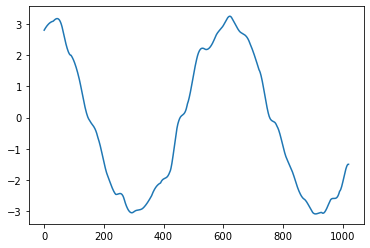

In [477]:
plt.plot(yc)

In [308]:
xi

array([  1,   2, 351, 403, 437])

In [ ]:
%addaTrend=(x-yc)';
addaTrend=yc';

figure;
plot(1:length(x),x,'.k',1:length(x),yc,'-r');
xlabel('Time (month)');
ylabel('Sunspot number');
title(FileName);
figure;
plot(1:length(x),addaTrend,'-g');
xlabel('Time (month)');
ylabel('Sunspot number');
title(FileName);
fn = sprintf('%s_K%d_trend',FileName,K);
save(fn,'addaTrend','-ascii');

In [309]:
xi= np.array([1, 2, 3, 4, 5])
xi[2:4]= np.array([351.20, 403.25, 437.90])

ValueError: could not broadcast input array from shape (3) into shape (2)

In [458]:
Detrend = suma - yc
plt.plot(Detrend)

ValueError: operands could not be broadcast together with shapes (1024,) (1022,) 